# Data

In [99]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df_2023=pd.read_csv('df_2023.csv')
# df_2024=pd.read_csv('df_2024_adjusted.csv')
df_22_24=pd.read_csv('df_22_24.csv')

# Create a datetime index for df_2024, starting from January 1st, 2024
# date_range_2024 = pd.date_range(start="2024-01-01", periods=len(df_2024), freq="H")
# # Assign the datetime index to df_2024
# df_2024.index = date_range_2024

# # Create a datetime index for df_2024, starting from January 1st, 2024
date_range_2023 = pd.date_range(start="2023-01-01", periods=len(df_2023), freq="H")
# Assign the datetime index to df_2024
df_2023.index = date_range_2023

date_range_22_24= pd.date_range(start="2022-11-01", periods=len(df_22_24), freq="H")
df_22_24.index=date_range_22_24

In [100]:
percentile = 0.02

# Outliers extraction 2023

### Highest prices

In [101]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(1-percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(1-percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(1-percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(1-percentile)

df_2023_pos_sec_h = df_2023[df_2023['Price_positive_secondary_2023'] >= quantile_2023_pos_sec]
df_2023_neg_sec_h = df_2023[df_2023['Price_negative_secondary_2023'] >= quantile_2023_neg_sec]
df_2023_pos_ter_h = df_2023[df_2023['Price_positive_tertiary_2023'] >= quantile_2023_pos_ter]
df_2023_neg_ter_h = df_2023[df_2023['Price_negative_tertiary_2023'] >= quantile_2023_neg_ter]

In [102]:
df_2023_pos_sec_h.shape, df_2023_neg_sec_h.shape, df_2023_pos_ter_h.shape, df_2023_neg_ter_h.shape

((176, 48), (176, 48), (176, 48), (177, 48))

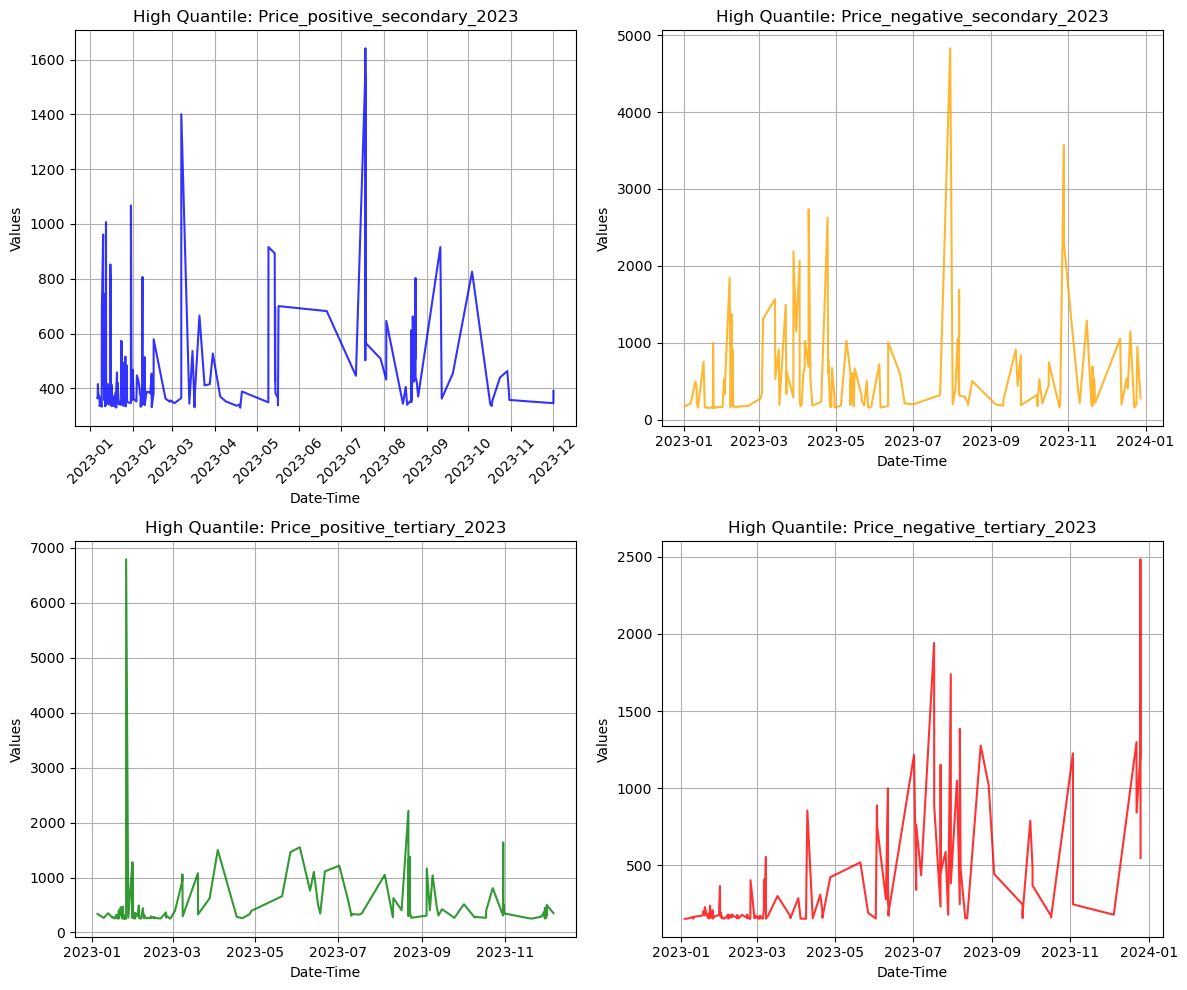

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_h.index, 
    df_2023_pos_sec_h['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_h.index, 
    df_2023_neg_sec_h['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_h.index, 
    df_2023_pos_ter_h['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_h.index, 
    df_2023_neg_ter_h['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Smallest Prices

In [104]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(percentile)

df_2023_pos_sec_l = df_2023[df_2023['Price_positive_secondary_2023'] <= quantile_2023_pos_sec]
df_2023_neg_sec_l = df_2023[df_2023['Price_negative_secondary_2023'] <= quantile_2023_neg_sec]
df_2023_pos_ter_l = df_2023[df_2023['Price_positive_tertiary_2023'] <= quantile_2023_pos_ter]
df_2023_neg_ter_l = df_2023[df_2023['Price_negative_tertiary_2023'] <= quantile_2023_neg_ter]

In [105]:
df_2023_neg_sec_l.head()

,Unnamed: 0,Price_positive_secondary_2023,Price_negative_secondary_2023,Price_positive_tertiary_2023,Price_negative_tertiary_2023,Price_gas_2023,Imbalance netting import_2023,Imbalance netting export_2023,Energy_positive_secondary_2023_24,Energy_negative_secondary_2023_24,...,RR n 2023,Total System Imbalance 2023,Exchange_CH_AT_2023,Exchange_AT_CH_2023,Exchange_CH_DE_2023,Exchange_DE_CH_2023,Exchange_CH_FR_2023,Exchange_FR_CH_2023,Exchange_CH_IT_2023,Exchange_IT_CH_2023
2023-01-01 01:00:00,1,0.00,0.0,0.0,0.000,67.5,11.708483,0.000000,0.000,0.0,...,0.0,-74.068023,32.200,203.940,13.400,529.105,108.382,169.753,451.595,0.015
2023-01-01 16:00:00,16,124.10,0.0,0.0,8.212,67.5,0.000000,-24.359726,12.150,0.0,...,0.0,179.486719,103.631,13.587,185.286,131.972,0.000,377.847,296.963,0.000
2023-01-01 17:00:00,17,245.40,0.0,0.0,7.020,67.5,10.087219,0.000000,33.907,0.0,...,-30.0,102.372566,141.281,9.200,317.490,130.400,0.000,367.135,255.358,0.512
2023-01-03 08:00:00,56,233.00,0.0,0.0,125.873,62.5,65.797542,0.000000,5.331,0.0,...,-140.0,229.479349,53.700,112.877,166.966,226.660,0.001,303.776,579.971,0.800
2023-01-04 06:00:00,78,305.45,0.0,0.0,0.000,66.4,0.000000,-31.754151,35.968,0.0,...,0.0,96.933341,55.200,249.948,22.900,716.570,0.000,698.575,901.752,0.193


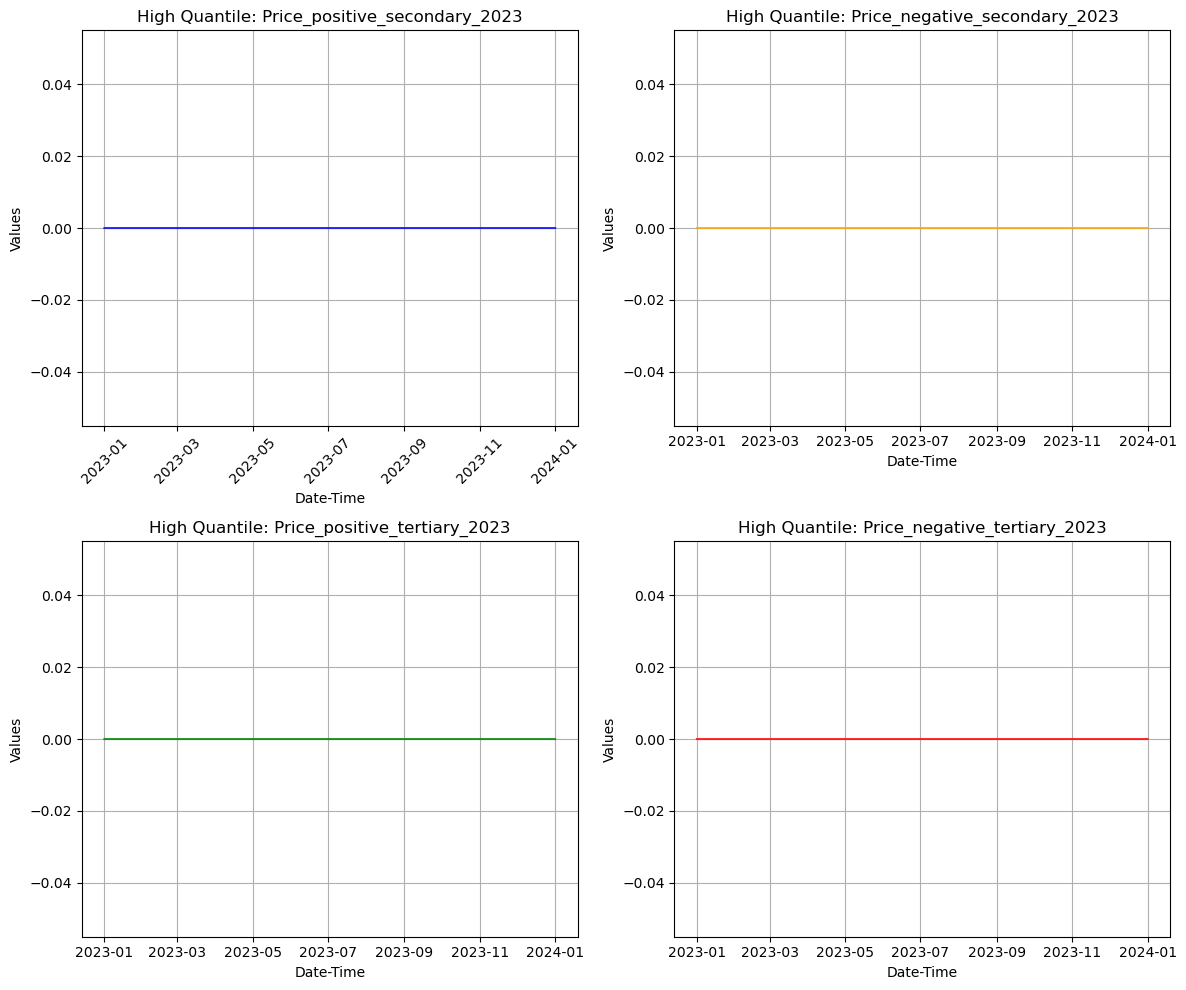

In [106]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_l.index, 
    df_2023_pos_sec_l['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_l.index, 
    df_2023_neg_sec_l['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_l.index, 
    df_2023_pos_ter_l['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_l.index, 
    df_2023_neg_ter_l['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Outliers extraction 2023+2 weeks 2024

In [107]:
# Define the start and end datetime for filtering.
start_date = '2023-01-01 00:00:00'
# For hourly data, the first two weeks of 2024 run from January 1 to January 14 (inclusive).
end_date = '2024-01-14 23:00:00'

# Use .loc to slice the DataFrame based on the datetime index.
df_result = df_22_24.loc[start_date:end_date]

In [108]:
quantile_pos_sec = df_result['Price_positive_secondary'].quantile(1-percentile)
quantile_neg_sec = df_result['Price_negative_secondary'].quantile(1-percentile)
quantile_pos_ter = df_result['Price_positive_tertiary'].quantile(1-percentile)
quantile_neg_ter = df_result['Price_negative_tertiary'].quantile(1-percentile)

df_result_pos_sec = df_result[df_result['Price_positive_secondary'] >= quantile_pos_sec]
df_result_neg_sec = df_result[df_result['Price_negative_secondary'] >= quantile_neg_sec]
df_result_pos_ter = df_result[df_result['Price_positive_tertiary'] >= quantile_pos_ter]
df_result_neg_ter = df_result[df_result['Price_negative_tertiary'] >= quantile_neg_ter]

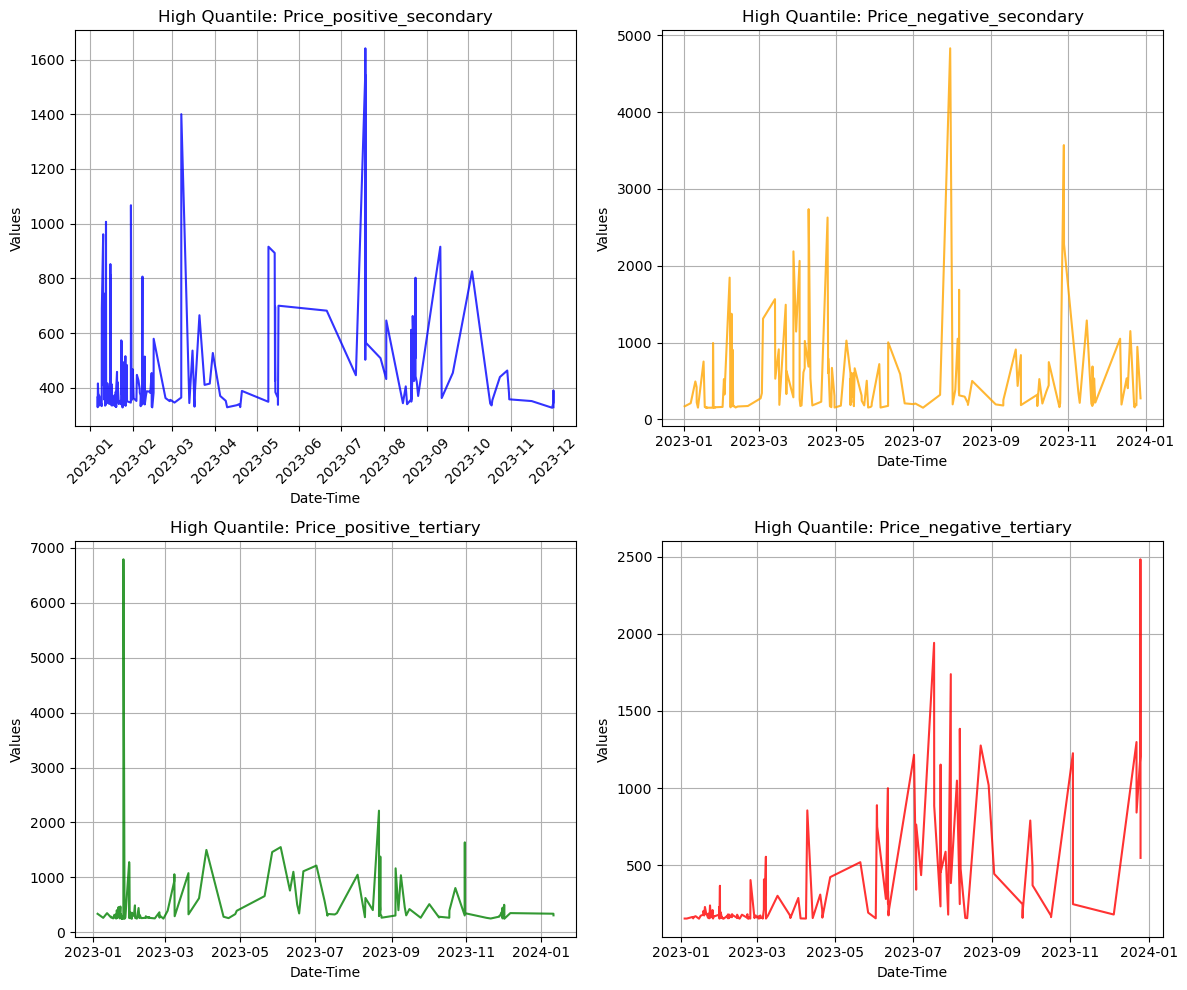

In [109]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_result_pos_sec.index, 
    df_result_pos_sec['Price_positive_secondary'], 
    label='Price_positive_secondary (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_result_neg_sec.index, 
    df_result_neg_sec['Price_negative_secondary'], 
    label='Price_negative_secondary (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_result_pos_ter.index, 
    df_result_pos_ter['Price_positive_tertiary'], 
    label='Price_positive_tertiary (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_result_neg_ter.index, 
    df_result_neg_ter['Price_negative_tertiary'], 
    label='Price_negative_tertiary (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [110]:
#Sort prices by type and level
df_pos_sec_sorted = df_result_pos_sec.sort_values(by='Price_positive_secondary', ascending=False)
df_neg_sec_sorted = df_result_neg_sec.sort_values(by='Price_negative_secondary', ascending=False)
df_pos_ter_sorted = df_result_pos_ter.sort_values(by='Price_positive_tertiary', ascending=False)
df_neg_ter_sorted = df_result_neg_ter.sort_values(by='Price_negative_tertiary', ascending=False)

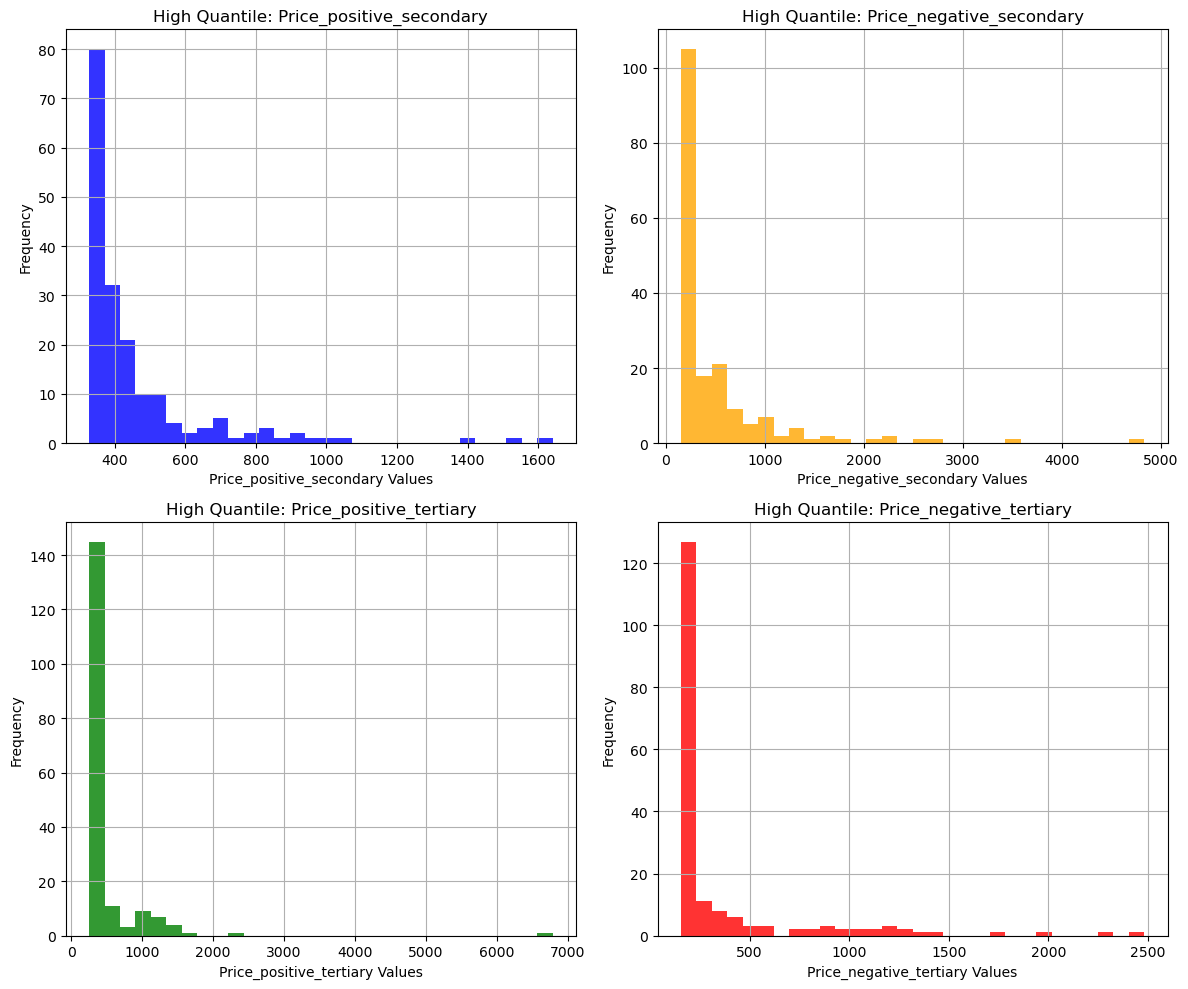

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Histogram for Price_positive_secondary (HIGH)
#
axs[0, 0].hist(
    df_pos_sec_sorted['Price_positive_secondary'], 
    bins=30,
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary')
axs[0, 0].set_xlabel('Price_positive_secondary Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

#
# 2) Histogram for Price_negative_secondary (HIGH)
#
axs[0, 1].hist(
    df_neg_sec_sorted['Price_negative_secondary'], 
    bins=30,
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary')
axs[0, 1].set_xlabel('Price_negative_secondary Values')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

#
# 3) Histogram for Price_positive_tertiary (HIGH)
#
axs[1, 0].hist(
    df_pos_ter_sorted['Price_positive_tertiary'], 
    bins=30,
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary')
axs[1, 0].set_xlabel('Price_positive_tertiary Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

#
# 4) Histogram for Price_negative_tertiary (HIGH)
#
axs[1, 1].hist(
    df_neg_ter_sorted['Price_negative_tertiary'], 
    bins=30,
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary')
axs[1, 1].set_xlabel('Price_negative_tertiary Values')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

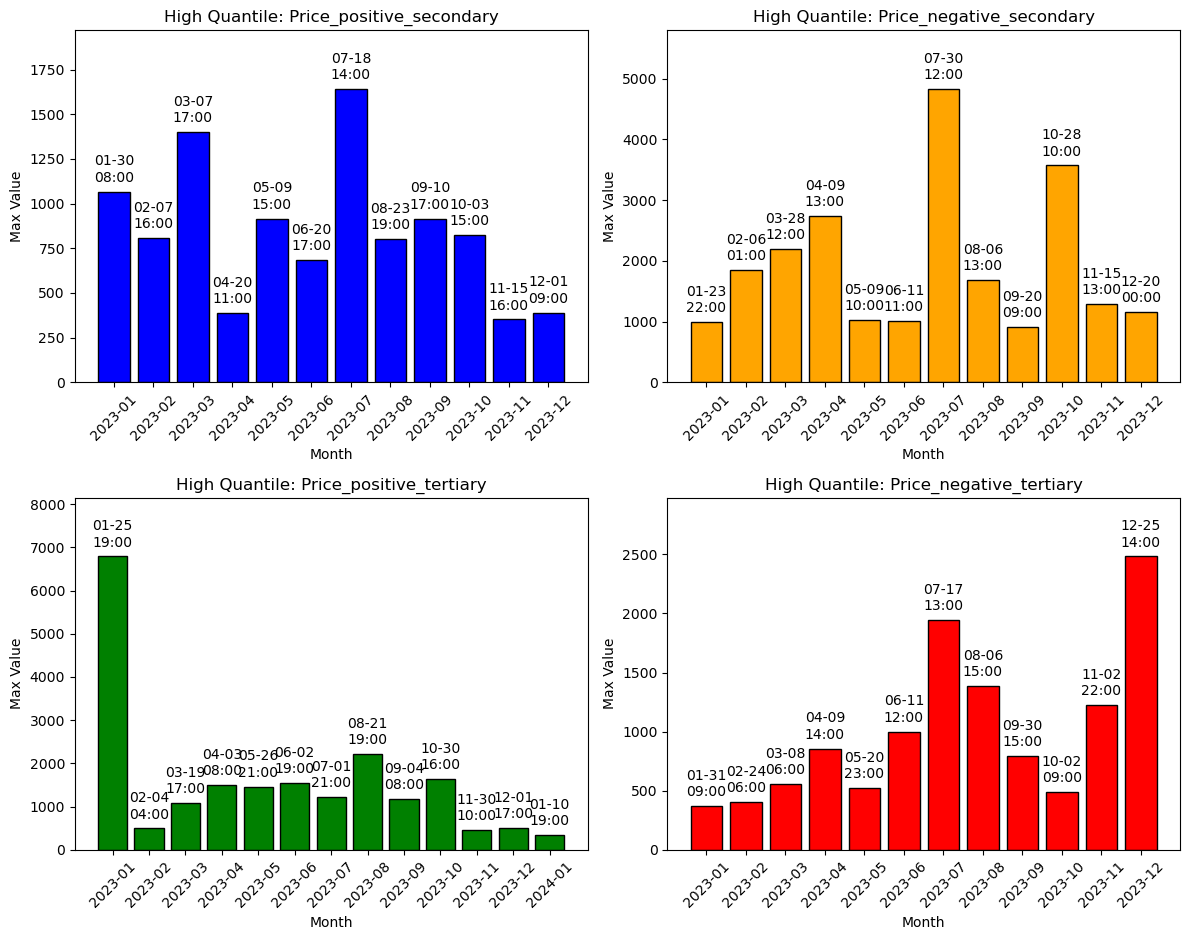

In [112]:
def get_monthly_max(df, column):
    df.index = pd.to_datetime(df.index)
    
    def get_max_info(group):
        if group.empty:
            return pd.Series({'max_date': pd.NaT, 'max_value': None})
        max_idx = group[column].idxmax()
        return pd.Series({
            'max_date': max_idx,
            'max_value': group.loc[max_idx, column]
        })
    
    monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
    monthly_max['month'] = monthly_max.index.strftime('%Y-%m')
    return monthly_max

def plot_monthly_max(ax, df, column, title, color):
    monthly_max = get_monthly_max(df, column)
    
    # Create bar chart
    ax.bar(monthly_max['month'], monthly_max['max_value'], color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Max Value')
    ax.tick_params(axis='x', rotation=45)
    
    # Adjust y-axis limit to leave extra space for annotations
    max_val = monthly_max['max_value'].max()
    if pd.notnull(max_val):
        ax.set_ylim(0, max_val * 1.2)
    
    # Annotate each bar with the date and hour (on two lines) where the maximum occurred.
    for _, row in monthly_max.iterrows():
        if pd.notnull(row['max_date']):
            annotation_text = row['max_date'].strftime('%m-%d\n%H:%M')
            ax.annotate(
                annotation_text,
                xy=(row['month'], row['max_value']),
                xytext=(0, 5),  # vertical offset in points
                textcoords='offset points',
                ha='center',
                va='bottom'
            )

# Example plotting code using a 2x2 subplot layout
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_monthly_max(
    axs[0, 0], 
    df_pos_sec_sorted, 
    'Price_positive_secondary', 
    'High Quantile: Price_positive_secondary', 
    'blue'
)

plot_monthly_max(
    axs[0, 1], 
    df_neg_sec_sorted, 
    'Price_negative_secondary', 
    'High Quantile: Price_negative_secondary', 
    'orange'
)

plot_monthly_max(
    axs[1, 0], 
    df_pos_ter_sorted, 
    'Price_positive_tertiary', 
    'High Quantile: Price_positive_tertiary', 
    'green'
)

plot_monthly_max(
    axs[1, 1], 
    df_neg_ter_sorted, 
    'Price_negative_tertiary', 
    'High Quantile: Price_negative_tertiary', 
    'red'
)

# Adjust overall layout to leave space at the top so titles aren't blocked
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [113]:
#Create list of max values for type and level
max_pos_sec = get_monthly_max(df_pos_sec_sorted, 'Price_positive_secondary')
max_neg_sec = get_monthly_max(df_neg_sec_sorted, 'Price_negative_secondary')
max_pos_ter = get_monthly_max(df_pos_ter_sorted, 'Price_positive_tertiary')
max_neg_ter = get_monthly_max(df_neg_ter_sorted, 'Price_negative_tertiary')

In [114]:
max_neg_sec

,max_date,max_value,month
2023-01-31,2023-01-23 22:00:00,995.25,2023-01
2023-02-28,2023-02-06 01:00:00,1846.13,2023-02
2023-03-31,2023-03-28 12:00:00,2187.42,2023-03
2023-04-30,2023-04-09 13:00:00,2737.12,2023-04
2023-05-31,2023-05-09 10:00:00,1026.34,2023-05
2023-06-30,2023-06-11 11:00:00,1004.16,2023-06
2023-07-31,2023-07-30 12:00:00,4830.24,2023-07
2023-08-31,2023-08-06 13:00:00,1687.90,2023-08
2023-09-30,2023-09-20 09:00:00,910.61,2023-09
2023-10-31,2023-10-28 10:00:00,3570.40,2023-10


## Isolating Max Values
The objective is to extract n values around the max values each month to identify possible reasons of spike (service, political, etc). Create a CSV list of them

In [115]:
n = 3

In [116]:
def extract_window(df, max_timestamp, window=3):
    """
    Extract a window of rows from df around the row corresponding to max_timestamp.
    
    Parameters:
      df: DataFrame with a datetime index.
      max_timestamp: The timestamp (of type pd.Timestamp or str) where the max occurs.
      window: Number of rows before and after the max to include.
    
    Returns:
      A DataFrame window with an extra column for the relative position.
    """
    # Ensure timestamp is a pd.Timestamp
    max_timestamp = pd.to_datetime(max_timestamp)
    
    # Get the integer position of the max_timestamp in df.index.
    pos = df.index.get_loc(max_timestamp)
    
    # Determine the start and end positions of the window.
    start = max(pos - window, 0)
    end = min(pos + window + 1, len(df))
    
    # Extract the window.
    window_df = df.iloc[start:end].copy()
    
    # Create a relative position column: 0 corresponds to the max, negative before, positive after.
    window_df['relative_position'] = np.arange(start, end) - pos
    return window_df

In [117]:

# Ensure the folder exists (it will create it if it doesn't)
folder_path = "Max_per_month"
os.makedirs(folder_path, exist_ok=True)

# List of dataframes and corresponding file names
data_frames = [max_pos_sec, max_neg_sec, max_pos_ter, max_pos_ter]
file_names = [
    "Positive_secondary.csv",
    "Negative_secondary.csv",
    "Positive_tertiary.csv",
    "Negative_tertiary.csv"
]

for df, file_name in zip(data_frames, file_names):
    output_filename = os.path.join(folder_path, file_name)
    with open(output_filename, "w", newline="") as f:
        header_written = False
        
        # Iterate over each unique max timestamp in the "max_id" column.
        for max_timestamp in df['max_date']:
            # Extract the window of rows around this max timestamp.
            window_df = extract_window(df_result, max_timestamp, window=n)
            
            # Write the window to the CSV, writing the header only once.
            window_df.to_csv(f, index=False, header=not header_written)
            header_written = True
            
            # Write an extra blank line to separate the window blocks.
            f.write("\n")
    print(f"CSV file created at: {output_filename}")

CSV file created at: Max_per_month\Positive_secondary.csv
CSV file created at: Max_per_month\Negative_secondary.csv
CSV file created at: Max_per_month\Positive_tertiary.csv
CSV file created at: Max_per_month\Negative_tertiary.csv
